In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("select_if_user_id__0__1_0___timeid_from_.csv",sep=";", header = None, names=['user','date'])

In [3]:
# data.set_index("date", inplace=True)

In [4]:
data.head(5)

,user,date
0,0,2017-12-31 23:31:04
1,1,2017-12-31 23:08:22
2,1,2017-12-31 22:36:16
3,1,2017-12-31 21:48:40
4,0,2017-12-31 21:26:05


In [5]:
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

In [6]:
# data.groupby(pd.Grouper(key='date', freq='W')).agg('count')

In [7]:
result = data.groupby(pd.Grouper(key='date', freq='W')).sum()

In [8]:
result['count'] = data.groupby(pd.Grouper(key='date', freq='W')).agg('count')

In [9]:
result['non_reg'] = result['count'] - result['user']

In [10]:
result

,user,count,non_reg
date,,,
2015-01-04,95,184,89
2015-01-11,223,426,203
2015-01-18,340,658,318
2015-01-25,343,663,320
2015-02-01,327,658,331
2015-02-08,292,651,359
2015-02-15,361,738,377
2015-02-22,313,657,344
2015-03-01,280,646,366


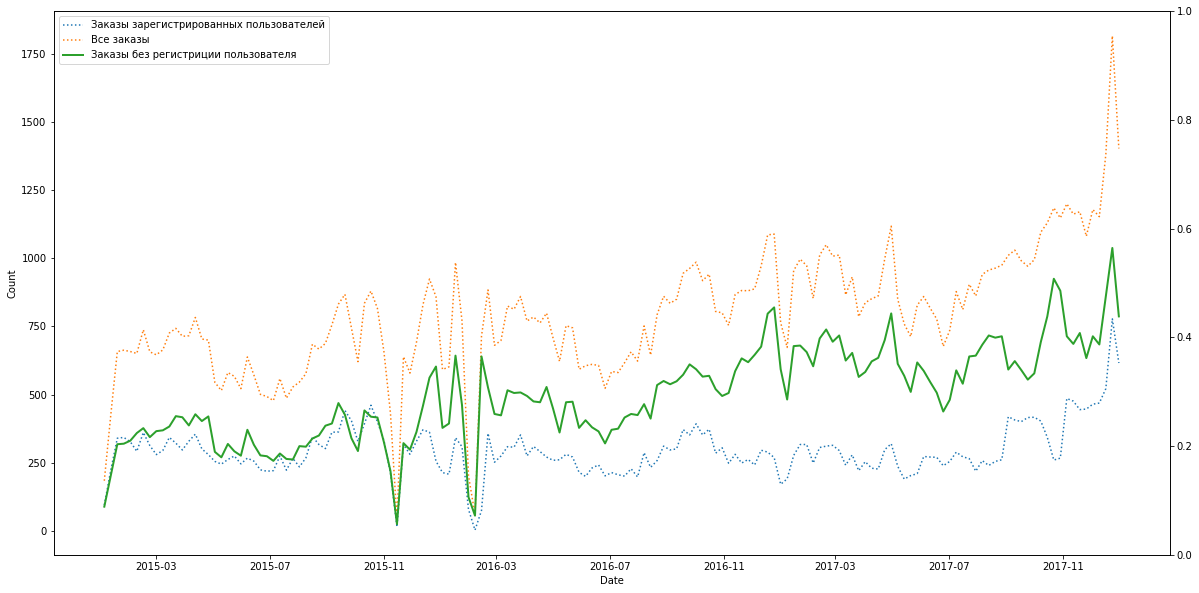

<Figure size 2160x1440 with 0 Axes>

In [20]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.figure(figsize=(30, 20))
ax2 = ax1.twinx()
ax1.set_xlabel("Date")
ax1.set_ylabel("Count")
ax1.plot(result['user'],linestyle='dotted')
ax1.plot(result['count'],linestyle='dotted')
ax1.plot(result['non_reg'],linewidth=2)
ax1.legend([u'Заказы зарегистрированных пользователей',u'Все заказы',u'Заказы без регистриции пользователя'])


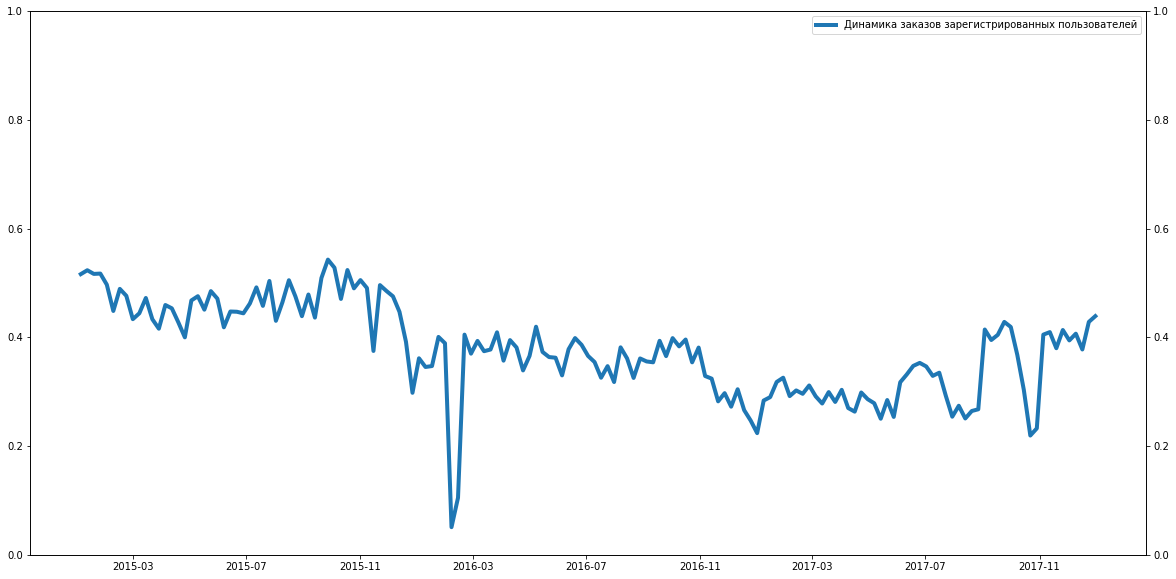

In [22]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
ax2.plot(result['user']/result['count'],linestyle='solid',linewidth=4)
ax2.set_ylim([0,1])
ax2.legend([u'Динамика заказов зарегистрированных пользователей'])